In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

In [2]:
loandata = pd.read_csv('LoanData_prepared.csv')


In [3]:
df = pd.DataFrame(loandata)
df.shape

(241909, 21)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241909 entries, 0 to 241908
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   AppliedAmount                      241909 non-null  float64
 1   DebtToIncome                       241909 non-null  float64
 2   AmountOfPreviousLoansBeforeLoan    241909 non-null  float64
 3   Country                            241909 non-null  object 
 4   Education                          241909 non-null  object 
 5   EmploymentDurationCurrentEmployer  241909 non-null  object 
 6   ExistingLiabilities                241909 non-null  int64  
 7   FreeCash                           241909 non-null  float64
 8   Gender                             241909 non-null  object 
 9   HomeOwnershipType                  241909 non-null  object 
 10  IncomeTotal                        241909 non-null  float64
 11  Interest                           2419

In [55]:
def format_vertical_headers(df):
    """Display a dataframe with vertical column headers"""
    styles = [dict(selector="th", props=[('width', '40px')]),
              dict(selector="th.col_heading",
                   props=[("writing-mode", "vertical-rl"),
                          ('transform', 'rotateZ(180deg)'), 
                          ('height', '290px'),
                          ('vertical-align', 'text-top')])]
    return (df.fillna('').style.set_table_styles(styles))

format_vertical_headers(pd.DataFrame(df.head()))

,AppliedAmount,DebtToIncome,AmountOfPreviousLoansBeforeLoan,Country,Education,EmploymentDurationCurrentEmployer,ExistingLiabilities,FreeCash,Gender,HomeOwnershipType,IncomeTotal,Interest,LiabilitiesTotal,LoanDuration,MonthlyPayment,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,VerificationType,LanguageCode,Default,Age_Group
0,3189.000000,0.000000,3402.000000,EE,Vocational education,UpTo5Years,0,0.000000,Female,Other,900.000000,35.480000,0.000000,60,115.340000,0,1.000000,Income and expenses verified,Estonian,1,18-30
1,4146.000000,0.000000,518.000000,FI,Higher education,UpTo5Years,0,0.000000,Female,Owner,3100.000000,19.860000,0.000000,60,108.170000,0,1.000000,Income and expenses verified,Finnish,1,31-40
2,531.000000,0.000000,1593.000000,EE,Higher education,UpTo5Years,0,0.000000,Male,"Tenant, pre-furnished property",1700.000000,19.520000,0.000000,60,15.250000,0,3.000000,Income and expenses verified,Estonian,1,18-30
3,2125.000000,26.290000,500.000000,EE,Secondary education,MoreThan5Years,8,10.920000,Female,Owner,354.000000,20.970000,485.090000,60,62.050000,0,1.000000,Income and expenses verified,Estonian,0,51-60
4,518.000000,0.000000,19283.000000,FI,Higher education,MoreThan5Years,0,0.000000,Female,Owner,4800.000000,19.880000,0.000000,60,13.510000,0,10.000000,Income and expenses verified,Finnish,0,31-40


In [22]:
df.head()

,AppliedAmount,DebtToIncome,AmountOfPreviousLoansBeforeLoan,Country,Education,EmploymentDurationCurrentEmployer,ExistingLiabilities,FreeCash,Gender,HomeOwnershipType,...,Interest,LiabilitiesTotal,LoanDuration,MonthlyPayment,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,VerificationType,LanguageCode,Default,Age_Group
0,3189.0,0.00,3402.0,EE,Vocational education,UpTo5Years,0,0.00,Female,Other,...,35.48,0.00,60,115.34,0,1.0,Income and expenses verified,Estonian,1,18-30
1,4146.0,0.00,518.0,FI,Higher education,UpTo5Years,0,0.00,Female,Owner,...,19.86,0.00,60,108.17,0,1.0,Income and expenses verified,Finnish,1,31-40
2,531.0,0.00,1593.0,EE,Higher education,UpTo5Years,0,0.00,Male,"Tenant, pre-furnished property",...,19.52,0.00,60,15.25,0,3.0,Income and expenses verified,Estonian,1,18-30
3,2125.0,26.29,500.0,EE,Secondary education,MoreThan5Years,8,10.92,Female,Owner,...,20.97,485.09,60,62.05,0,1.0,Income and expenses verified,Estonian,0,51-60
4,518.0,0.00,19283.0,FI,Higher education,MoreThan5Years,0,0.00,Female,Owner,...,19.88,0.00,60,13.51,0,10.0,Income and expenses verified,Finnish,0,31-40


In [9]:
profile = ProfileReport(df, title = "Loan data EDA report",
                        dataset={
                            "author": "Azeglio Vasco Martinelli"
                        },
                        correlations={
                            "pearson": {"calculate": True},
                            "spearman": {"calculate": True},
                            "cramers": {"calculate": True},
                            "phi_k": {"calculate": True},
                        },
                        interactions={'continous':True})

In [10]:
profile.to_file("ydata_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\azegl\anaconda3\envs\benv\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the pearson correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"pearson": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'EE'')
  warnings.warn(
c:\Users\azegl\anaconda3\envs\benv\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the spearman correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"spearman": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert strin

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
import sweetviz as sv

my_report = sv.analyze(df, "Default")
my_report.show_html()


                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
categorical_values = ['Country', 'Education', 'EmploymentDurationCurrentEmployer', 'Gender', 'HomeOwnershipType', 'NewCreditCustomer',
                      'VerificationType', 'LanguageCode','Age_Group', 'Default']
numerical_values = ['AppliedAmount', 'DebtToIncome', 'AmountOfPreviousLoansBeforeLoan', 'ExistingLiabilities', 'FreeCash', 'IncomeTotal', 'Interest', 
                    'LiabilitiesTotal', 'LoanDuration', 'MonthlyPayment', 'NoOfPreviousLoansBeforeLoan']

In [7]:
pearson = df.corr(method="pearson", numeric_only=True)
spearman = df.corr(method="spearman", numeric_only=True)

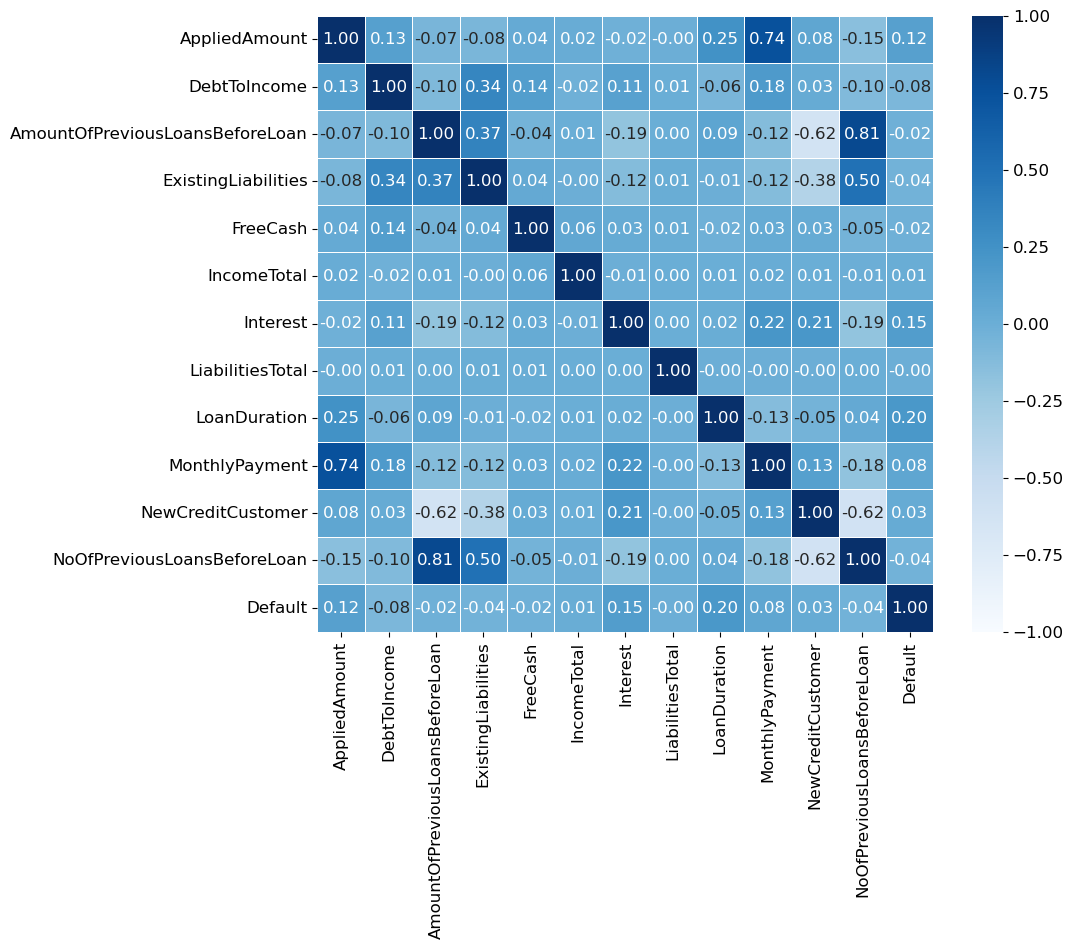

In [34]:
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(pearson, cmap = 'Blues', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.title("Pearson's correlation matrix")
plt.show()

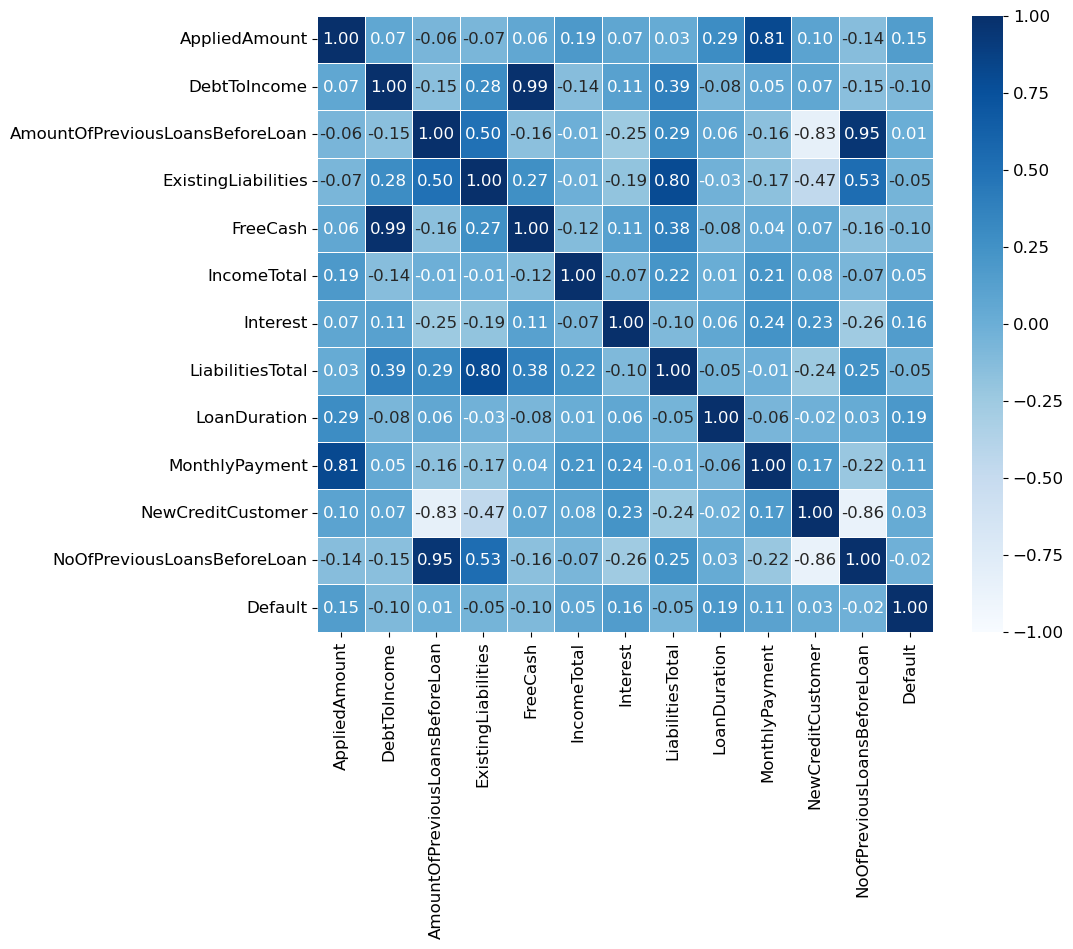

In [35]:
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(spearman, cmap = 'Blues', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.title("Spearman's correlation matrix")
plt.show()

In [13]:
# Create two arrays containing only numeric or only categorical columns
categorical_values = ['Country', 'Education', 'EmploymentDurationCurrentEmployer', 'Gender', 'HomeOwnershipType', 'NewCreditCustomer',
                      'VerificationType', 'LanguageCode','Age_Group', 'Default']
numerical_values = ['AppliedAmount', 'DebtToIncome', 'AmountOfPreviousLoansBeforeLoan', 'ExistingLiabilities', 'FreeCash', 'IncomeTotal', 'Interest', 
                    'LiabilitiesTotal', 'LoanDuration', 'MonthlyPayment', 'NoOfPreviousLoansBeforeLoan']

Text(0.5, 1.0, 'Point biseral r correlation')

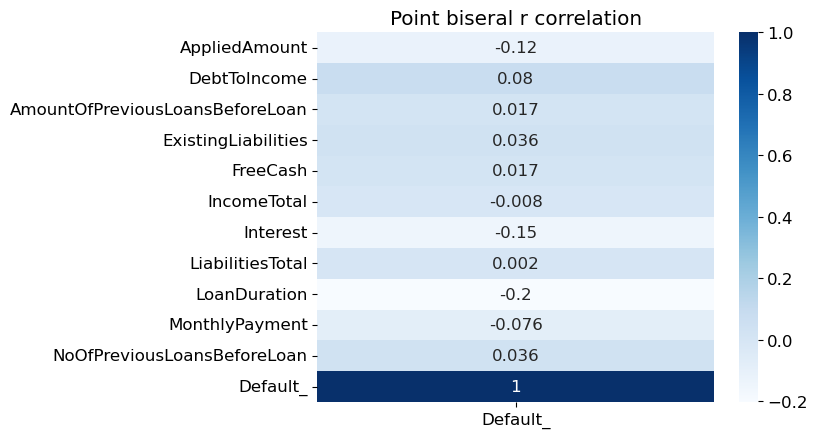

In [40]:
# Define a function that returns the point biserial r between a numerical and a categorical variable
def pointbiserialr(x, y):
  r, p_value = stats.pointbiserialr(x, y)
  return r

# Factorize the categorical target. 
df['Default_'] = pd.factorize(df['Default'])[0]

# Create a DataFrame with the numerical variables and the factorized target
df_biserial = pd.concat((df[numerical_values], df['Default_']), axis=1)

# Plot a heatmap with the point biserial r coefficients between the target and the numerical variables
sns.heatmap(pd.DataFrame(df_biserial.corr(method=pointbiserialr)['Default_']), annot=True, cmap="Blues")
plt.title("Point biseral r correlation")

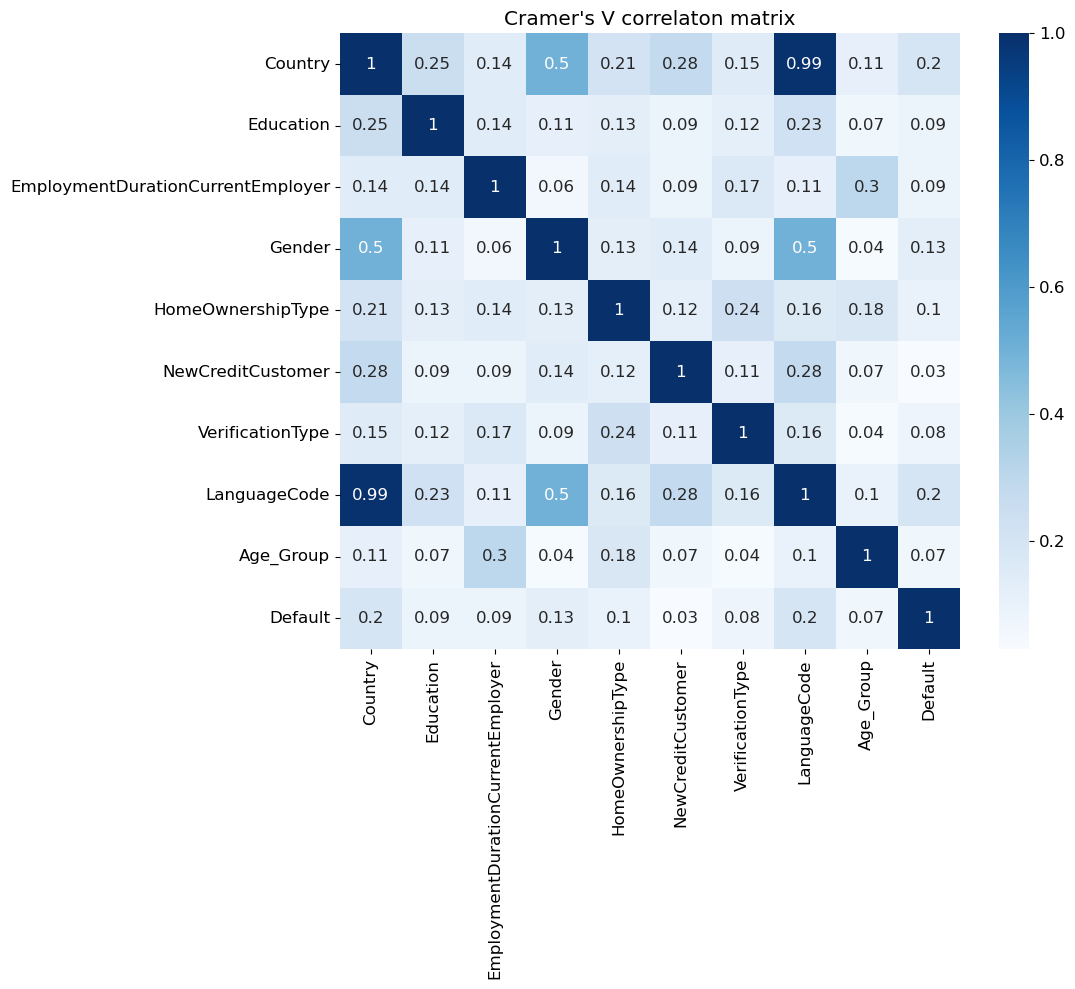

In [39]:
# Create Cramer's V correlation matrix for categorical values
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Factorize the categorical variables
df_factorized = df[categorical_values].apply(lambda x: pd.factorize(x)[0])

plt.figure(figsize= (10,8))
# Plot the correlation matrix in a heatmap
sns.heatmap(round(df_factorized.corr(method=cramers_v), 2), annot=True, cmap='Blues')

plt.title("Cramer's V correlation matrix")
#sns.set(font_scale=1.5)
plt.show()

<Axes: >

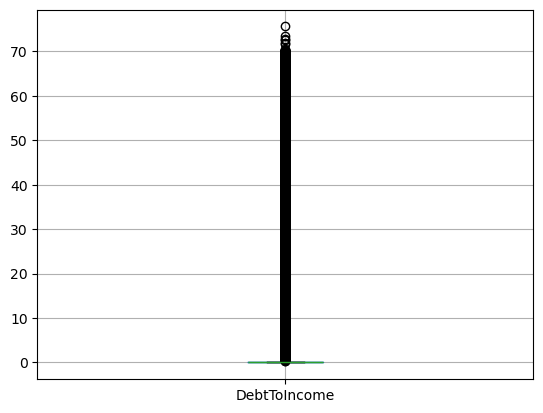

In [5]:
df.boxplot(column=['DebtToIncome'])